In [1]:
import keras 
import tensorflow as tf
from keras.datasets import cifar10
import numpy as np
from keras.callbacks import History 
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#mapa logistico del ejercicio
def logistic_map(x):
    return 4*x*(1-x)

In [3]:
def randomize(x,y):
    #x matriz de imagenes (imagenes x dimension)
    #y matriz de scores verdaderos (imagenes x categorias)
    indices = np.random.choice(x.shape[0], x.shape[0], replace=False)
    x = x[indices]
    y = y[indices]
    return x,y

In [4]:
#funcion que genera los datos
#n_datos es el numero de datos
def generate_data(n_datos):
    x= np.random.uniform(0,1,n_datos)
    y = logistic_map(x)
    return x,y

In [88]:
#genero los datos
n_datos = 100000
x_total,y_total = generate_data(n_datos)
#hago shuffle de los datos
x_total, y_total = randomize(x_total,y_total)
#separo en datos de train y test 
x_train = x_total[:75000]
y_train = y_total[:75000]
x_test = x_total[75000:]
y_test = y_total[75000:]
#algunos parametros de la red
n_dim = 1
n_capa1 = 5
n_capa2 = 1
epocas = 200
lr = 1e-3
rg = 1e-4

In [89]:
#armo la red neuronal
x = keras.layers.Input(shape=(n_dim,))
l1 = keras.layers.Dense(units=n_capa1,kernel_regularizer=keras.regularizers.l2(rg),use_bias=True,
                        activation='tanh')(x)
l2 = keras.layers.Concatenate()([l1,x])
l3 = keras.layers.Dense(units=n_capa2,kernel_regularizer=keras.regularizers.l2(rg),use_bias=True,
                        activation='linear')(l2)
model = keras.Model(inputs=x, outputs=l3)
optimizer = keras.optimizers.SGD(learning_rate=lr)
model.compile(optimizer, loss=keras.losses.MSE,metrics=['mse'])
history = model.fit(x_train, y_train, epochs=epocas, validation_data=(x_test, y_test),batch_size=100, verbose=2)


Train on 75000 samples, validate on 25000 samples
Epoch 1/200
 - 1s - loss: 0.1538 - mse: 0.1536 - val_loss: 0.0984 - val_mse: 0.0982
Epoch 2/200
 - 1s - loss: 0.0964 - mse: 0.0962 - val_loss: 0.0936 - val_mse: 0.0934
Epoch 3/200
 - 1s - loss: 0.0929 - mse: 0.0927 - val_loss: 0.0909 - val_mse: 0.0907
Epoch 4/200
 - 1s - loss: 0.0907 - mse: 0.0905 - val_loss: 0.0891 - val_mse: 0.0889
Epoch 5/200
 - 1s - loss: 0.0892 - mse: 0.0890 - val_loss: 0.0878 - val_mse: 0.0876
Epoch 6/200
 - 1s - loss: 0.0881 - mse: 0.0879 - val_loss: 0.0870 - val_mse: 0.0868
Epoch 7/200
 - 1s - loss: 0.0874 - mse: 0.0872 - val_loss: 0.0864 - val_mse: 0.0862
Epoch 8/200
 - 1s - loss: 0.0869 - mse: 0.0867 - val_loss: 0.0859 - val_mse: 0.0857
Epoch 9/200
 - 2s - loss: 0.0865 - mse: 0.0863 - val_loss: 0.0856 - val_mse: 0.0854
Epoch 10/200
 - 2s - loss: 0.0862 - mse: 0.0860 - val_loss: 0.0853 - val_mse: 0.0851
Epoch 11/200
 - 1s - loss: 0.0860 - mse: 0.0857 - val_loss: 0.0850 - val_mse: 0.0848
Epoch 12/200
 - 1s - los

Epoch 97/200
 - 1s - loss: 0.0368 - mse: 0.0360 - val_loss: 0.0360 - val_mse: 0.0352
Epoch 98/200
 - 1s - loss: 0.0358 - mse: 0.0350 - val_loss: 0.0350 - val_mse: 0.0342
Epoch 99/200
 - 1s - loss: 0.0348 - mse: 0.0340 - val_loss: 0.0340 - val_mse: 0.0332
Epoch 100/200
 - 1s - loss: 0.0337 - mse: 0.0330 - val_loss: 0.0330 - val_mse: 0.0322
Epoch 101/200
 - 1s - loss: 0.0327 - mse: 0.0319 - val_loss: 0.0320 - val_mse: 0.0312
Epoch 102/200
 - 2s - loss: 0.0318 - mse: 0.0309 - val_loss: 0.0310 - val_mse: 0.0302
Epoch 103/200
 - 1s - loss: 0.0308 - mse: 0.0299 - val_loss: 0.0301 - val_mse: 0.0292
Epoch 104/200
 - 1s - loss: 0.0298 - mse: 0.0290 - val_loss: 0.0291 - val_mse: 0.0282
Epoch 105/200
 - 1s - loss: 0.0289 - mse: 0.0280 - val_loss: 0.0282 - val_mse: 0.0273
Epoch 106/200
 - 1s - loss: 0.0279 - mse: 0.0270 - val_loss: 0.0272 - val_mse: 0.0264
Epoch 107/200
 - 1s - loss: 0.0270 - mse: 0.0261 - val_loss: 0.0263 - val_mse: 0.0254
Epoch 108/200
 - 1s - loss: 0.0261 - mse: 0.0252 - val_lo

Epoch 193/200
 - 1s - loss: 0.0034 - mse: 0.0019 - val_loss: 0.0034 - val_mse: 0.0019
Epoch 194/200
 - 1s - loss: 0.0034 - mse: 0.0019 - val_loss: 0.0034 - val_mse: 0.0019
Epoch 195/200
 - 1s - loss: 0.0034 - mse: 0.0019 - val_loss: 0.0034 - val_mse: 0.0019
Epoch 196/200
 - 1s - loss: 0.0034 - mse: 0.0019 - val_loss: 0.0034 - val_mse: 0.0019
Epoch 197/200
 - 1s - loss: 0.0034 - mse: 0.0019 - val_loss: 0.0034 - val_mse: 0.0018
Epoch 198/200
 - 1s - loss: 0.0034 - mse: 0.0018 - val_loss: 0.0034 - val_mse: 0.0018
Epoch 199/200
 - 1s - loss: 0.0034 - mse: 0.0018 - val_loss: 0.0033 - val_mse: 0.0018
Epoch 200/200
 - 1s - loss: 0.0033 - mse: 0.0018 - val_loss: 0.0033 - val_mse: 0.0018


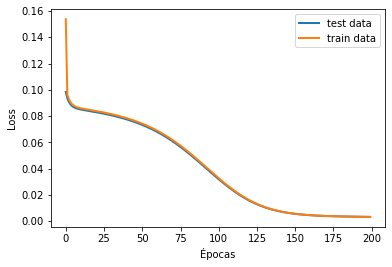

In [90]:
plt.plot(history.history['val_loss'],label='test data',linewidth=2)
plt.plot(history.history['loss'],label='train data',linewidth=2)
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Loss')
loss_final_ts = history.history['loss'][-1]
loss_final_tr = history.history['val_loss'][-1]
#plt.text(140,400,'loss train final: '+str(round(loss_final_tr,2))+'\n loss test final: '+str(round(loss_final_ts,2)))
#plt.savefig('ej5_1.pdf')

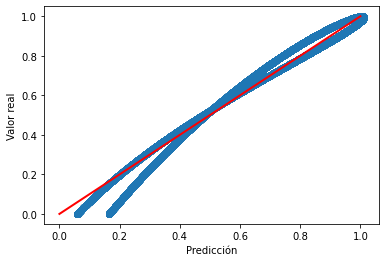

In [91]:
y_pr = model.predict(x_test)
plt.scatter(y_pr,y_test)
plt.xlabel('Predicción')
plt.ylabel('Valor real')
x_aux = np.linspace(min(y_test),max(y_test),100)
plt.plot(x_aux,x_aux,c='r',linewidth=2)
#plt.savefig('ej5_2.pdf')